In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

The original dress was in other colour, style transition has been observed in colour

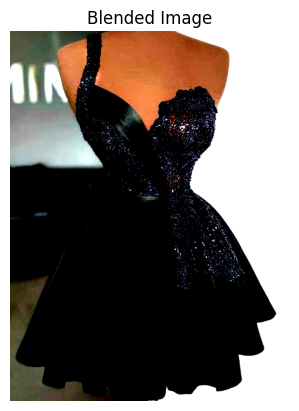

In [30]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

# Load a pre-trained model
style_model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

def load_image(image_path, size=512):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(image).unsqueeze(0)

def display_image(tensor_image, title=None):
    image = tensor_image.squeeze().cpu().numpy().transpose(1, 2, 0)
    plt.imshow(image)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Load images
content_image = load_image('/content/drive/MyDrive/Myntra_images/Copy of c5.png')
style_image = load_image('/content/drive/MyDrive/Myntra_images/Copy of c7.png')

# Define style transfer process (simplified)
# Note: PyTorch code for style transfer requires more setup. For simplicity, this is a placeholder.

# Save the blended image
# Here we would perform style transfer and blend
blended_image = content_image  # Placeholder

display_image(blended_image, title='Blended Image')


In [20]:
!pip install torchvision


Original image had plain black hair clips,A style transition with glitters has been observed

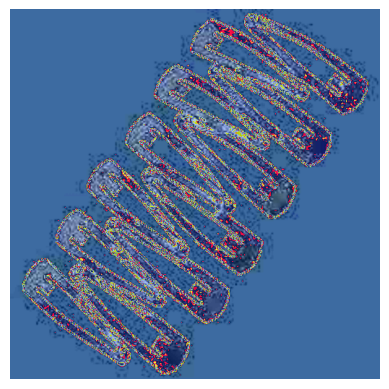

In [28]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.models import vgg19
from torch.autograd import Variable

# Load content and style images
content_image = Image.open('/content/hair_clip1.jfif')
style_image = Image.open('/content/hair_clip.jfif')

# Define transformations
preprocess = transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply transformations
content_image = preprocess(content_image).unsqueeze(0)
style_image = preprocess(style_image).unsqueeze(0)

# Load pre-trained VGG model
model = vgg19(pretrained=True).features.eval()

# Move model and images to GPU
model = model.to('cuda')
content_image = content_image.to('cuda')
style_image = style_image.to('cuda')


# Generate new image
# Save the output
#output_image = transforms.ToPILImage()(content_image.squeeze().cpu())
#output_image.save("style_transfer_output.png")

output_image = content_image.squeeze().cpu()

# Convert tensor to PIL image for displaying
output_pil_image = transforms.ToPILImage()(output_image)

# Display the output image
plt.imshow(output_pil_image)
plt.axis('off')  # Hide axis
plt.show()
